In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
df=pd.read_csv('./data/output.csv')
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [4]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [5]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [6]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})

In [7]:
df['Sex'].value_counts()

Sex
3    29
2    26
0    26
1    23
Name: count, dtype: int64

In [8]:
df['Anaemic'].value_counts()

Anaemic
0    78
1    26
Name: count, dtype: int64

In [9]:
df.head(15)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,2,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,3,43.2870,30.6972,26.0158,12.4,0
5,6,2,45.0994,27.9645,26.9361,16.2,0
6,7,0,43.1457,30.1628,26.6915,8.6,1
7,8,1,43.6103,29.1099,27.2798,10.3,0
8,9,0,45.0423,29.1660,25.7918,13.0,0
9,10,0,46.5143,27.4282,26.0575,9.7,1


In [10]:
#split dataset in features and target variable
X = df.drop('Anaemic', axis=1) # Features
y= df['Anaemic']

In [11]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
#predicting the output for out test set
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0])

In [14]:
X_test

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
30,31,2,44.2572,29.6578,26.0850,12.9
65,66,1,45.4201,29.4684,25.1115,12.0
64,65,1,38.7968,31.3618,29.8414,8.5
53,54,1,47.1003,28.3195,24.5801,12.4
45,46,3,46.9428,27.2219,25.8353,13.3
93,94,3,47.7549,26.2457,25.9994,15.2
91,92,3,43.1425,30.2890,26.5686,9.5
47,48,2,45.7581,27.2867,26.9553,11.8
10,11,0,45.3506,29.1248,25.5246,12.6
0,1,2,43.2555,30.8421,25.9025,6.3


In [15]:
# import the metrics class to create confusion matrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20,  0],
       [ 0,  6]])

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Text(0.5, 427.9555555555555, 'Predicted label')

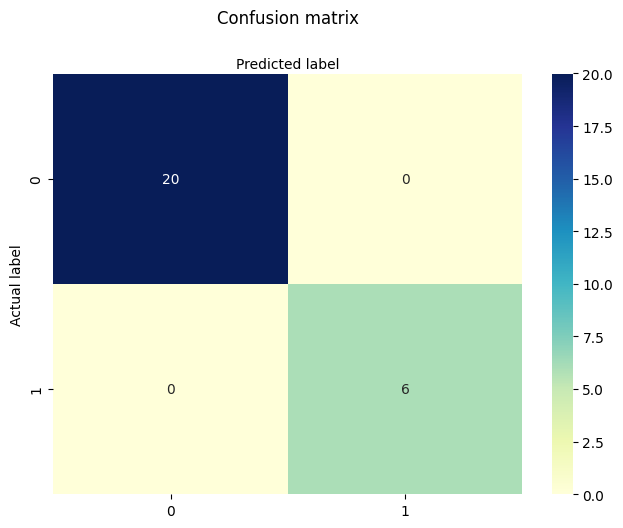

In [17]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

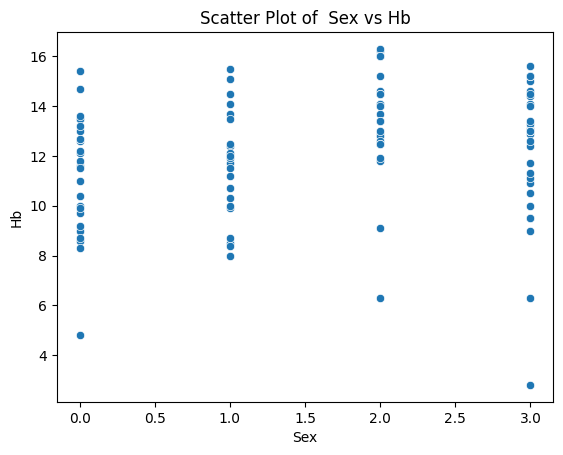

In [18]:
# create a scatter plot
sns.scatterplot(x='Sex',y='Hb',data=df)
plt.title("Scatter Plot of  Sex vs Hb")
plt.show()

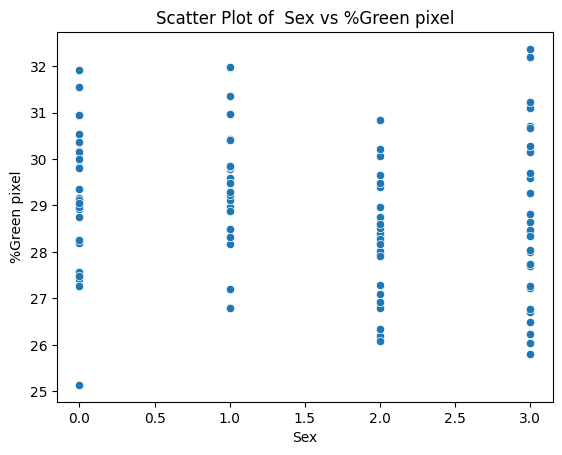

In [19]:
sns.scatterplot(x='Sex',y='%Green pixel',data=df)
plt.title("Scatter Plot of  Sex vs %Green pixel")
plt.show()

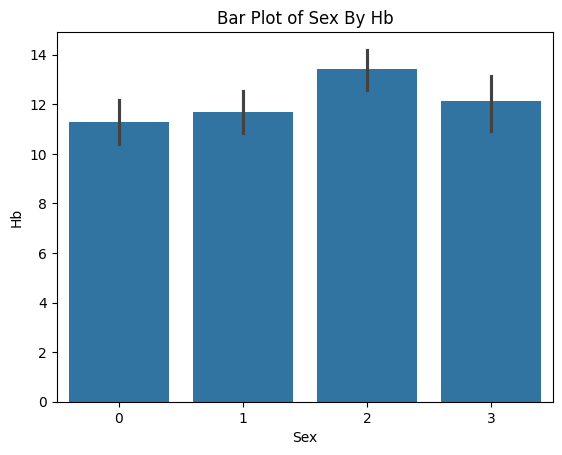

In [20]:
sns.barplot(x='Sex',y='Hb',data=df)
plt.title('Bar Plot of Sex By Hb')
plt.show()

<Axes: xlabel='Sex', ylabel='Hb'>

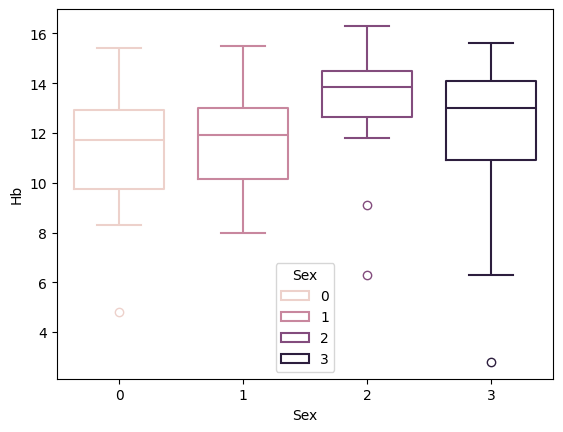

In [21]:
# Box Plot
sns.boxplot(x="Sex",y='Hb',data=df, hue="Sex", fill=False, gap=.1)

BY USING PLOTLY

In [23]:
import plotly.express as px

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [26]:
counts = results.value_counts().reset_index(name='Count')

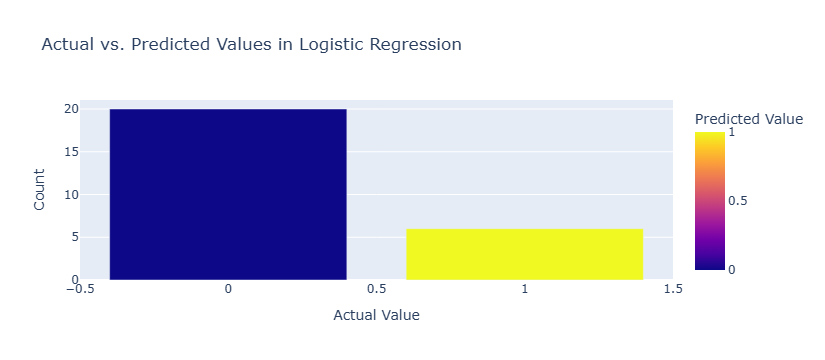

In [31]:
#Predicted vs. Actual Plot
fig1 = px.bar(counts, x='Actual', y='Count', color='Predicted',
             title='Actual vs. Predicted Values in Logistic Regression',
             labels={'Actual': 'Actual Value', 'Predicted': 'Predicted Value'},
             barmode='group')
fig1.show()

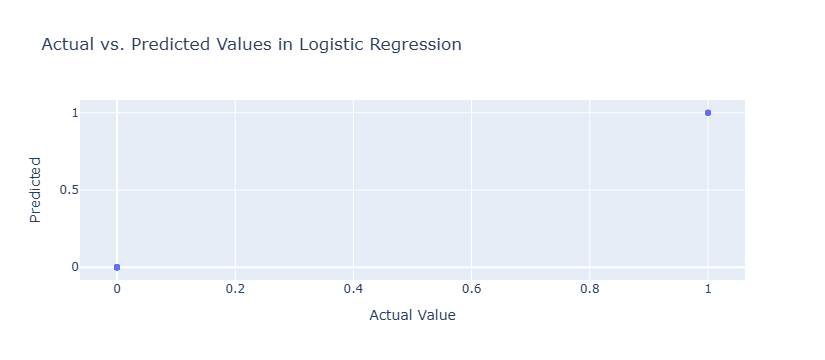

In [34]:
fig = px.scatter(results, x='Actual', y='Predicted',
                 title='Actual vs. Predicted Values in Logistic Regression',
                 labels={'Actual': 'Actual Value', 'Predicted': 'Predicted'},
                 opacity=0.7)
fig.show()